# Data Understanding

In [53]:
# import chardet
# with open(f"data/user.csv", 'rb') as f:
#     result = chardet.detect(f.read())
#     print(result)
# # # !pip install seaborn
# # !pip install chardet
# # !pip install streamlit
# # !pip install scikit-surprise

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jinja2.compiler import generate

# DATA_PATH = "../input/dataset-fixx"

info_tourism = pd.read_csv(f"data/tourism_with_id.csv", encoding='Johab')
tourism_rating = pd.read_csv(f"data/tourism_rating.csv", encoding='ascii')
users = pd.read_csv(f"data/user.csv", encoding='ascii')

In [90]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Transportasi,Fasilitas,Jumlah Ulasan
15,16,Pantai joko mursodo,Pantai ini dikenal dengan suasana alami dan pe...,Alam,Lamongan,10000,4.3,"mobil, sepeda motor, bus,만lf","Area parkir, Warung dan kios makanan, Fasilita...",91
16,17,Pantai maldives kemantren,"Pantai ini disebut ""Maldives""-nya Lamongan kar...",Alam,Lamongan,10000,4.4,"mobil, sepeda motor, bus,만lf","Area parkir, Warung makan dan kios jajanan, Fa...",653
3,4,Masjid Namira,Masjid Namira adalah masjid modern yang terken...,Religi,Lamongan,0,4.8,"mobil, sepeda motor, bus,만lf","Area parkir, Ruang ibadah yang luas, Mihrab da...","19,368"
17,18,Istana gunung mas 27,Istana Gunung Mas adalah restoran dan tempat w...,Alam,Lamongan,0,4.1,"mobil, sepeda motor, bus,만lf","Area parkir, Ruang pameran dan galeri, Ruang a...",749
24,25,Makam nyi andong sari,Makam ini adalah tempat ziarah yang berhubunga...,Religi,Lamongan,0,4.3,"mobil, sepeda motor, bus,만lf","Area parkir, Kompleks makam dan taman, Masjid ...",38


In [91]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
155,6,26,4.66667
145,6,16,4.83000
609,24,12,3.50000
438,17,23,3.83000
489,19,22,5.00000


In [92]:
users.sample(5)

,User_Id,Name,Location,Age,Gender
29,30,M Hilmi Bisri,Jombang,20,Laki-Laki
7,8,Ririn Dwi Ariyanti,"karanggeneng, lamongan",20,Perempuan
13,14,Nadia,Nganjuk,20,Perempuan
69,70,Vigo Candra Abimanyu,Surabaya,20,Laki-Laki
4,5,Luthfi Rahman Rizqi Ramadhani,Lamongan,23,Laki-Laki


In [93]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 26
Number of users : 74
The number of ratings given by the user to the dataset : 1924


# Exploratory Data Analysis

In [94]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Place_Id       26 non-null     int64  
 1   Place_Name     26 non-null     object 
 2   Description    26 non-null     object 
 3   Category       26 non-null     object 
 4   City           26 non-null     object 
 5   Price          26 non-null     int64  
 6   Rating         26 non-null     float64
 7   Transportasi   26 non-null     object 
 8   Fasilitas      26 non-null     object 
 9   Jumlah Ulasan  26 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.2+ KB


In [95]:
info_tourism.isnull().sum()

Place_Id         0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
Transportasi     0
Fasilitas        0
Jumlah Ulasan    0
dtype: int64

In [96]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        1924 non-null   int64  
 1   Place_Id       1924 non-null   int64  
 2   Place_Ratings  1924 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 45.2 KB


In [97]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [98]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   74 non-null     int64 
 1   Name      74 non-null     object
 2   Location  74 non-null     object
 3   Age       74 non-null     int64 
 4   Gender    74 non-null     object
dtypes: int64(2), object(3)
memory usage: 3.0+ KB


In [99]:
users.isnull().sum()

User_Id     0
Name        0
Location    0
Age         0
Gender      0
dtype: int64

In [100]:
info_tourism.Category.unique()

array(['Themepark', 'Edukasi', 'Alam', 'Religi', 'Olahraga', 'Kuliner',
       'Belanja', 'Alam&Kuliner'], dtype=object)

# Data Preprocessing

In [101]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 26


In [102]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,1,4.50000
1,1,2,4.50000
2,1,3,4.83000
3,1,4,5.00000
4,1,5,4.50000
...,...,...,...
1919,74,22,3.17000
1920,74,23,3.00000
1921,74,24,3.17000
1922,74,25,2.83000


In [103]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category","Price"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price
0,1,1,4.50000,Wisata Bahari Lamongan,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Themepark,145000
1,1,2,4.50000,Maharani zoo & goa,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Edukasi,40000
2,1,3,4.83000,Tanjung kodok,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Alam,100000
3,1,4,5.00000,Masjid Namira,Masjid Namira adalah masjid modern yang terken...,Lamongan,Religi,0
4,1,5,4.50000,Alun-alun Lamongan,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Olahraga,0
...,...,...,...,...,...,...,...,...
1919,74,22,3.17000,Keraton bbj babat,Keraton ini merupakan tempat bersejarah yang m...,Lamongan,Belanja,0
1920,74,23,3.00000,Makam dewi serdadu,Makam ini memiliki nilai sejarah dan dipercaya...,Lamongan,Religi,0
1921,74,24,3.17000,Pantai lohgung brondong,Pantai ini menawarkan keindahan alam dan suasa...,Lamongan,Alam,0
1922,74,25,2.83000,Makam nyi andong sari,Makam ini adalah tempat ziarah yang berhubunga...,Lamongan,Religi,0


In [104]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [105]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,1,4.50000,Wisata Bahari Lamongan,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Themepark,145000,Lamongan Themepark
1,1,2,4.50000,Maharani zoo & goa,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Edukasi,40000,Lamongan Edukasi
2,1,3,4.83000,Tanjung kodok,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Alam,100000,Lamongan Alam
3,1,4,5.00000,Masjid Namira,Masjid Namira adalah masjid modern yang terken...,Lamongan,Religi,0,Lamongan Religi
4,1,5,4.50000,Alun-alun Lamongan,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Olahraga,0,Lamongan Olahraga
...,...,...,...,...,...,...,...,...,...
1919,74,22,3.17000,Keraton bbj babat,Keraton ini merupakan tempat bersejarah yang m...,Lamongan,Belanja,0,Lamongan Belanja
1920,74,23,3.00000,Makam dewi serdadu,Makam ini memiliki nilai sejarah dan dipercaya...,Lamongan,Religi,0,Lamongan Religi
1921,74,24,3.17000,Pantai lohgung brondong,Pantai ini menawarkan keindahan alam dan suasa...,Lamongan,Alam,0,Lamongan Alam
1922,74,25,2.83000,Makam nyi andong sari,Makam ini adalah tempat ziarah yang berhubunga...,Lamongan,Religi,0,Lamongan Religi


# Data Preparation

## Missing Values

In [106]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
Price            0
city_category    0
dtype: int64

In [107]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,1,4.50,Wisata Bahari Lamongan,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Themepark,145000,Lamongan Themepark
1,1,2,4.50,Maharani zoo & goa,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Edukasi,40000,Lamongan Edukasi
2,1,3,4.83,Tanjung kodok,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Alam,100000,Lamongan Alam
3,1,4,5.00,Masjid Namira,Masjid Namira adalah masjid modern yang terken...,Lamongan,Religi,0,Lamongan Religi
4,1,5,4.50,Alun-alun Lamongan,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Olahraga,0,Lamongan Olahraga
5,1,6,5.00,Masjid Agung Lamongan,"Masjid ini merupakan ikon religi di Lamongan, ...",Lamongan,Religi,0,Lamongan Religi
6,1,7,4.00,Wego Lamongan,"Wego menawarkan wisata edukasi dan outbond, co...",Lamongan,Alam,25000,Lamongan Alam
7,1,8,5.00,Makam Sunan Drajat,Makam Sunan Drajat adalah tempat ziarah terken...,Lamongan,Religi,10000,Lamongan Religi
8,1,9,5.00,Makam maulana Ishaq,Maulana Ishaq dikenal sebagai ulama besar dan ...,Lamongan,Religi,0,Lamongan Religi
9,1,10,5.00,Museum Drajat,"Terletak di kompleks makam Sunan Drajat, museu...",Lamongan,Edukasi,0,Lamongan Edukasi


In [108]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

price = preparation.Price.tolist()

In [109]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category,
    "price":price
})

tourism_new

,id,name,category,description,city,city_category,price
0,1,Wisata Bahari Lamongan,Themepark,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Lamongan Themepark,145000
1,2,Maharani zoo & goa,Edukasi,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Lamongan Edukasi,40000
2,3,Tanjung kodok,Alam,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Lamongan Alam,100000
3,4,Masjid Namira,Religi,Masjid Namira adalah masjid modern yang terken...,Lamongan,Lamongan Religi,0
4,5,Alun-alun Lamongan,Olahraga,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Lamongan Olahraga,0
5,6,Masjid Agung Lamongan,Religi,"Masjid ini merupakan ikon religi di Lamongan, ...",Lamongan,Lamongan Religi,0
6,7,Wego Lamongan,Alam,"Wego menawarkan wisata edukasi dan outbond, co...",Lamongan,Lamongan Alam,25000
7,8,Makam Sunan Drajat,Religi,Makam Sunan Drajat adalah tempat ziarah terken...,Lamongan,Lamongan Religi,10000
8,9,Makam maulana Ishaq,Religi,Maulana Ishaq dikenal sebagai ulama besar dan ...,Lamongan,Lamongan Religi,0
9,10,Museum Drajat,Edukasi,"Terletak di kompleks makam Sunan Drajat, museu...",Lamongan,Lamongan Edukasi,0


In [112]:
top_10 = tourism_new['id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10,preparation[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()


KeyError: 'index'

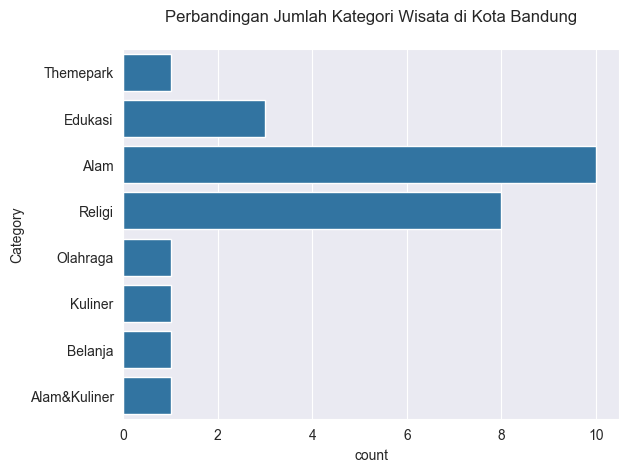

In [113]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

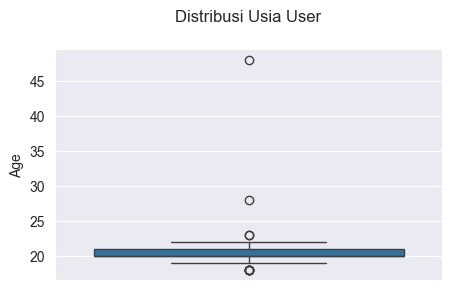

In [114]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

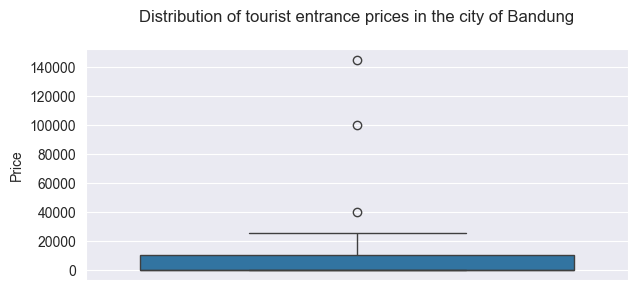

In [115]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribution of tourist entrance prices in the city of Bandung', pad=20)
plt.show()

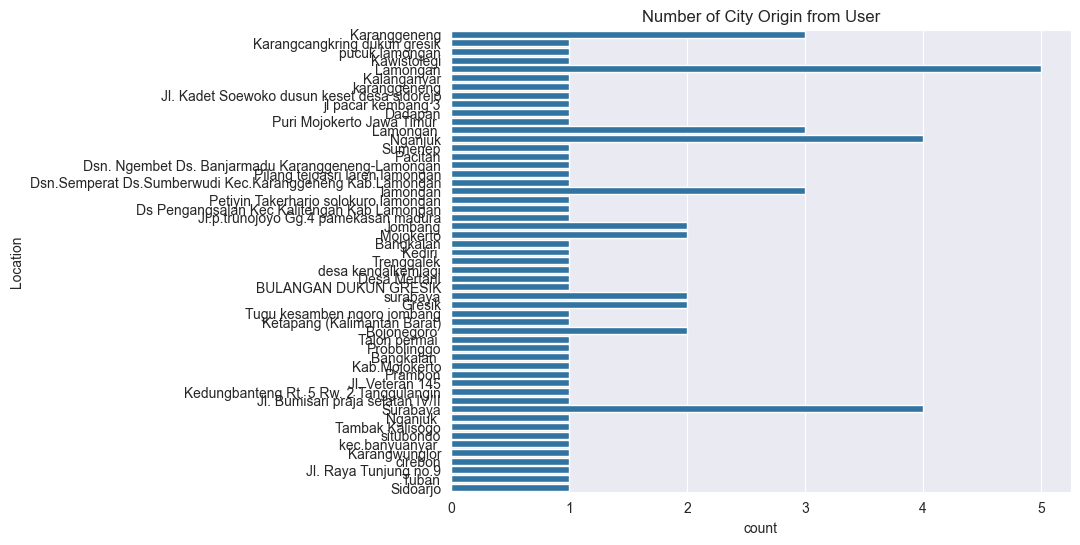

In [116]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualization of the origin of the city from the user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Number of City Origin from User')
plt.show()

#### 

# Content Based Filtering

In [117]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category,price
19,20,Makam sunan Sendang,Religi,Makam ini adalah salah satu tempat ziarah pent...,Lamongan,Lamongan Religi,0
25,26,Cafe Aola,Alam&Kuliner,Cafe Aola adalah tempat nongkrong yang nyaman ...,Lamongan,Lamongan Alam&Kuliner,25000
0,1,Wisata Bahari Lamongan,Themepark,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Lamongan Themepark,145000
21,22,Keraton bbj babat,Belanja,Keraton ini merupakan tempat bersejarah yang m...,Lamongan,Lamongan Belanja,0
8,9,Makam maulana Ishaq,Religi,Maulana Ishaq dikenal sebagai ulama besar dan ...,Lamongan,Lamongan Religi,0


## TF-IDF Vectorizer

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
# Combine Place_Name and Category into a single text column
data['combined'] = data['name'] + ' ' + data['category']
cv = CountVectorizer()

# Fit the vectorizer on the combined column
cv.fit(data['combined'])

# Print the feature names
print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['wisata', 'bahari', 'lamongan', 'themepark', 'maharani', 'zoo', 'goa', 'edukasi', 'tanjung', 'kodok', 'alam', 'masjid', 'namira', 'religi', 'alun', 'olahraga', 'agung', 'wego', 'makam', 'sunan', 'drajat', 'maulana', 'ishaq', 'museum', 'joko', 'tingkir', 'indonesia', 'islamic', 'art', 'pantai', 'putri', 'klayar', 'kutang', 'lorena', 'mursodo', 'maldives', 'kemantren', 'istana', 'gunung', 'mas', '27', 'waduk', 'gondang', 'sendang', 'bathil', 'kuliner', 'keraton', 'bbj', 'babat', 'belanja', 'dewi', 'serdadu', 'lohgung', 'brondong', 'nyi', 'andong', 'sari', 'cafe', 'aola']


In [190]:
cv_matrix = cv.transform(data['combined']) 
 
cv_matrix.shape 

(26, 59)

In [191]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]])

In [192]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,wisata,bahari,lamongan,themepark,maharani,zoo,goa,edukasi,tanjung,kodok,...,belanja,dewi,serdadu,lohgung,brondong,nyi,andong,sari,cafe,aola
name,,,,,,,,,,,,,,,,,,,,,
Masjid Agung Lamongan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Makam maulana Ishaq,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Istana gunung mas 27,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Masjid Namira,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wisata Bahari Lamongan,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


## Cosine Similarity

In [193]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , 0.        , 0.20412415,
        0.25      , 0.28867513, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28867513,
        0.        , 0.2236068 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.28867513, 0.33333333, 0.33333333,
        0.28867513, 0.28867513, 0.25819889, 0.33333333, 0.        ,
      

In [210]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Maharani zoo & goa,Pantai maldives kemantren,Wego Lamongan,Indonesia islamic art museum,Waduk gondang
name,,,,,
Wego Lamongan,0.0,0.288675,1.000000,0.000000,0.333333
Pantai kutang,0.0,0.577350,0.333333,0.000000,0.333333
Makam nyi andong sari,0.0,0.000000,0.000000,0.000000,0.000000
Pantai Putri Klayar,0.0,0.500000,0.288675,0.000000,0.288675
Masjid Agung Lamongan,0.0,0.000000,0.288675,0.000000,0.000000
Bathil,0.0,0.000000,0.000000,0.000000,0.000000
Makam dewi serdadu,0.0,0.000000,0.000000,0.000000,0.000000
Pantai lohgung brondong,0.0,0.500000,0.288675,0.000000,0.288675
Maharani zoo & goa,1.0,0.000000,0.000000,0.223607,0.000000


## Recommendation

In [206]:
def generate_candidates(category=None, name=None, max_price=None,  items=data[['id', 'name', 'category', 'description', 'city', 'price']]):
    filtered_items = items
    
    if category:
        filtered_items = filtered_items[filtered_items['category'].str.contains(category, case=False, na=False)]
    if name:
        filtered_items = filtered_items[filtered_items['name'].str.contains(name, case=False, na=False)]
    if max_price:
        filtered_items = filtered_items[filtered_items['price'] <= max_price]
    return filtered_items

In [211]:
# Function to generate candidates using `combined`
def generate_candidates(category=None, name=None, max_price=None, combined_query=None, items=data):
    filtered_items = items

    if category:
        filtered_items = filtered_items[filtered_items['category'].str.contains(category, case=False, na=False)]
    if name:
        filtered_items = filtered_items[filtered_items['name'].str.contains(name, case=False, na=False)]
    if max_price:
        filtered_items = filtered_items[filtered_items['price'] <= max_price]
    if combined_query:
        filtered_items = filtered_items[filtered_items['combined'].str.contains(combined_query, case=False, na=False)]
    
    return filtered_items

In [215]:
# Example Usage of Filtering
print("Filtered Candidates:")
filtered_candidates = generate_candidates(category="", combined_query="Masjid")
print(filtered_candidates.head(5))

Filtered Candidates:
   id                   name category  \
3   4          Masjid Namira   Religi   
5   6  Masjid Agung Lamongan   Religi   

                                                                                                                                                                                                    description  \
3  Masjid Namira adalah masjid modern yang terkenal dengan desain interior yang megah dan suasana nyaman untuk beribadah. Terletak di Lamongan, masjid ini sering menjadi tujuan wisata religi bagi umat Islam.   
5                                           Masjid ini merupakan ikon religi di Lamongan, dengan arsitektur yang megah dan bersejarah. Masjid Agung sering menjadi lokasi kegiatan keagamaan besar di kota ini.   

       city    city_category  price                      combined  
3  Lamongan  Lamongan Religi      0          Masjid Namira Religi  
5  Lamongan  Lamongan Religi      0  Masjid Agung Lamongan Religi  


In [243]:
def recommend_by_similarity(name, cosine_sim=cosine_sim, items=data, n=5):
    matching_items = items[items['name'].str.contains(name, case=False, na=False)]
    

    idx = matching_items.index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[1:n+1]]
    recommendations = items.iloc[top_indices][['name', 'category', 'price', 'description', 'city']]

    if recommendations.empty:
        print(f"No similar places found for '{name}'. Showing fallback recommendations.")
        fallback = items.sort_values(by=['rating', 'review_count'], ascending=[False, False])
        return fallback[['name', 'category', 'price', 'description', 'city']].head(n)
    
    return recommendations


In [246]:
similarity_recommendations = recommend_by_similarity("zoo", n=5)
print("Recommendations Based on Similarity:")
print(similarity_recommendations)


Recommendations Based on Similarity:
                            name   category   price  \
9                  Museum Drajat    Edukasi       0   
11  Indonesia islamic art museum    Edukasi       0   
0         Wisata Bahari Lamongan  Themepark  145000   
2                  Tanjung kodok       Alam  100000   
3                  Masjid Namira     Religi       0   

                                                                                                                                                                                                                                                      description  \
9                                                    Terletak di kompleks makam Sunan Drajat, museum ini menyimpan artefak sejarah dan benda-benda peninggalan Sunan Drajat, seperti gamelan, kitab kuno, dan barang-barang terkait penyebaran Islam di Lamongan.   
11                                                                Museum ini menampilkan berbagai koleksi seni

In [233]:
print("Sample data from 'name' column:")
print(data['name'].head(10))


Sample data from 'name' column:
0    Wisata Bahari Lamongan
1        Maharani zoo & goa
2             Tanjung kodok
3             Masjid Namira
4        Alun-alun Lamongan
5     Masjid Agung Lamongan
6             Wego Lamongan
7        Makam Sunan Drajat
8       Makam maulana Ishaq
9             Museum Drajat
Name: name, dtype: object


In [129]:
# # Originall
# def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
#     index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
#     
#     closest = similarity_data.columns[index[-1:-(k+2):-1]]
#     
#     closest = closest.drop(place_name,errors='ignore')
#     
#     return pd.DataFrame(closest).merge(items).head(k)

In [207]:
print(data['category'].unique())
print(data['name'].unique())


['Themepark' 'Edukasi' 'Alam' 'Religi' 'Olahraga' 'Kuliner' 'Belanja'
 'Alam&Kuliner']
['Wisata Bahari Lamongan' 'Maharani zoo & goa' 'Tanjung kodok'
 'Masjid Namira' 'Alun-alun Lamongan' 'Masjid Agung Lamongan'
 'Wego Lamongan' 'Makam Sunan Drajat' 'Makam maulana Ishaq'
 'Museum Drajat' 'Makam joko Tingkir' 'Indonesia islamic art museum'
 'Pantai Putri Klayar' 'Pantai kutang' 'Pantai lorena'
 'Pantai joko mursodo' 'Pantai maldives kemantren' 'Istana gunung mas 27'
 'Waduk gondang' 'Makam sunan Sendang' 'Bathil' 'Keraton bbj babat'
 'Makam dewi serdadu' 'Pantai lohgung brondong' 'Makam nyi andong sari'
 'Cafe Aola']


In [209]:
# tourism_recommendations("Air Mancur Menari")
# generate_candidates(city="Lamongan", max_price=100000).head(5)
# generate_candidates(category="Themepark").head(5)
generate_candidates(name="Pantai")

,id,name,category,description,city,price
12,13,Pantai Putri Klayar,Alam,Pantai ini menawarkan pemandangan yang indah dengan pasir putih dan suasana tenang. Lokasinya cocok untuk bersantai atau piknik bersama keluarga.,Lamongan,10000
13,14,Pantai kutang,Alam,"Pantai Kutang memiliki keunikan berupa akar-akar mangrove yang mencuat dari pasir. Nama ""Kutang"" berasal dari cerita lokal dan menjadi daya tarik tersendiri.",Lamongan,10000
14,15,Pantai lorena,Alam,"Pantai ini terkenal dengan keindahan matahari terbenamnya. Suasananya sepi, cocok untuk pengunjung yang mencari ketenangan.",Lamongan,10000
15,16,Pantai joko mursodo,Alam,Pantai ini dikenal dengan suasana alami dan pemandangan laut birunya. Lokasinya cocok untuk fotografi atau sekadar menikmati angin pantai.,Lamongan,10000
16,17,Pantai maldives kemantren,Alam,"Pantai ini disebut ""Maldives""-nya Lamongan karena memiliki suasana tropis dan air yang jernih, cocok untuk rekreasi keluarga.",Lamongan,10000
23,24,Pantai lohgung brondong,Alam,Pantai ini menawarkan keindahan alam dan suasana pantai yang asri. Cocok untuk bersantai dan menikmati angin laut.,Lamongan,0


In [188]:
# tourism_recommendations("Trans Studio Bandung")
# generate_candidates("pantai", 110000).head(5)

TypeError: first argument must be string or compiled pattern

# Collaborative Filtering

In [247]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [248]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,1,4.50000
1,1,2,4.50000
2,1,3,4.83000
3,1,4,5.00000
4,1,5,4.50000
...,...,...,...
1919,74,22,3.17000
1920,74,23,3.00000
1921,74,24,3.17000
1922,74,25,2.83000


## Data Preparation

### Encode

In [250]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [251]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [252]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [253]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 74, Number of Place: 26, Min Rating: 0.0, Max Rating: 5.0


## Train Test Split

In [254]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
1259,49,12,3.00,48,11
1623,63,12,3.33,62,11
611,24,14,3.17,23,13
514,20,21,5.00,19,20
413,16,24,0.00,15,23
...,...,...,...,...,...
1130,44,13,3.33,43,12
1294,50,21,3.33,49,20
860,34,3,3.83,33,2
1459,57,4,5.00,56,3


In [255]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[48 11]
 [62 11]
 [23 13]
 ...
 [33  2]
 [56  3]
 [43  8]] [0.6        0.66599998 0.63400002 ... 0.76599998 1.         1.        ]


## Training

In [348]:
import tensorflow as tf
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_place, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_place = num_place
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.place_embedding = layers.Embedding(
            num_place,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6)
        )
        self.place_bias = layers.Embedding(num_place, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        place_vector = self.place_embedding(inputs[:, 1])
        place_bias = self.place_bias(inputs[:, 1])

        dot_user_place = tf.tensordot(user_vector, place_vector, 2)
        x = dot_user_place + user_bias + place_bias
        return tf.nn.sigmoid(x)

    # Add get_config method for saving
    def get_config(self):
        return {
            "num_users": self.num_users,
            "num_place": self.num_place,
            "embedding_size": self.embedding_size,
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [349]:
model = RecommenderNet(num_users, num_place, 100)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [350]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 4,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7804 - root_mean_squared_error: 0.3960 - val_loss: 0.7784 - val_root_mean_squared_error: 0.3891
Epoch 2/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6890 - root_mean_squared_error: 0.3373 - val_loss: 0.7506 - val_root_mean_squared_error: 0.3739
Epoch 3/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6254 - root_mean_squared_error: 0.2976 - val_loss: 0.7270 - val_root_mean_squared_error: 0.3601
Epoch 4/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6051 - root_mean_squared_error: 0.2770 - val_loss: 0.7086 - val_root_mean_squared_error: 0.3489
Epoch 5/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.5852 - root_mean_squared_error: 0.2586 - val_loss: 0.6927 - val_root_mean_squared_error: 0.3390
Epoch 6/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.5530 - root_mean_squared_error: 0.2375 - val_loss: 0.6804 - val_root_mean_squared_error: 0.3309
Epoch 7/100
385/385 ━━━━━━━━━━━━━━━━━━━━ 0

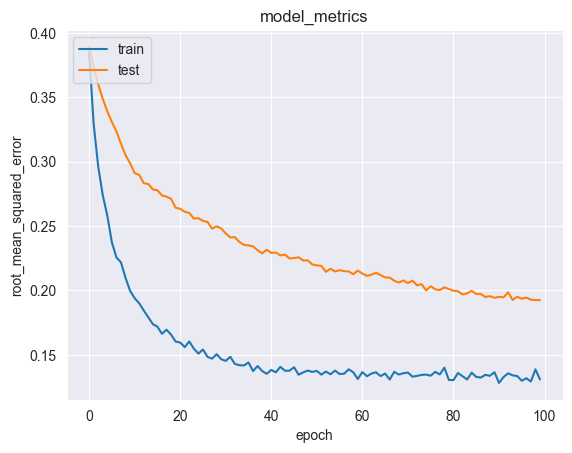

In [352]:
model.save("recommender_model.keras")

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recommendation

In [340]:
place_df = tourism_new
df = pd.read_csv(f'data/tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)
print(f"User ID: {user_id}")
print(f"Places visited by user: {place_visited_by_user['Place_Id'].values}")
print(f"Place IDs in place_df: {place_df['id'].values}")
print(f"Place IDs not visited: {place_not_visited}")

User ID: 9
Places visited by user: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
Place IDs in place_df: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
Place IDs not visited: []


In [343]:
# Check if all places are visited
if not place_not_visited:
    print(f"User {user_id} has visited all available places.")
    print("Predicting top visited places based on user's preferences:")
    
    # Prepare data for places already visited
    place_visited_encoded = [[place_to_place_encoded.get(x)] for x in place_visited_by_user['Place_Id'].values]
    user_place_array = np.hstack(
        ([[user_encoder]] * len(place_visited_encoded), place_visited_encoded)
    )
    
    # Predict ratings for visited places
    ratings = model.predict(user_place_array).flatten()
    
    # Get top 10 places from visited places
    top_ratings_indices = ratings.argsort()[-10:][::-1]
    recommended_place_ids = [
        place_encoded_to_place.get(place_visited_encoded[x][0]) for x in top_ratings_indices
    ]
    
    # Display top visited places
    place_df_rows = place_df[place_df['id'].isin(recommended_place_ids)]
    print(pd.DataFrame(place_df_rows))
else:
    # Standard recommendation flow
    place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
    user_encoder = user_to_user_encoded.get(user_id)
    user_place_array = np.hstack(
        ([[user_encoder]] * len(place_not_visited), place_not_visited)
    )
    
    # Predict ratings for unvisited places
    ratings = model.predict(user_place_array).flatten()
    
    # Get top 10 recommendations
    top_ratings_indices = ratings.argsort()[-10:][::-1]
    recommended_place_ids = [
        place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
    ]
    
    print('Showing recommendations for user: {}'.format(user_id))
    print('===' * 9)
    print('Places with high predicted ratings for the user:')
    print('----' * 8)
    
    # Display recommended places
    place_df_rows = place_df[place_df['id'].isin(recommended_place_ids)]
    print(pd.DataFrame(place_df_rows))


User 9 has visited all available places.
Predicting top visited places based on user's preferences:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
    id                    name      category  \
0    1  Wisata Bahari Lamongan     Themepark   
1    2      Maharani zoo & goa       Edukasi   
3    4           Masjid Namira        Religi   
4    5      Alun-alun Lamongan      Olahraga   
5    6   Masjid Agung Lamongan        Religi   
7    8      Makam Sunan Drajat        Religi   
9   10           Museum Drajat       Edukasi   
10  11      Makam joko Tingkir        Religi   
20  21                  Bathil       Kuliner   
25  26               Cafe Aola  Alam&Kuliner   

                                                                                                                                                                                                                                                      description  \
0   Wisata Bahari Lamongan merupakan taman hiburan keluarga yang terleta

In [64]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category,price
0,1,Wisata Bahari Lamongan,Wisata Themepark,Wisata Bahari Lamongan merupakan taman hiburan...,Lamongan,Lamongan Wisata Themepark,145000.0
1,2,Maharani zoo & goa,Wisata Edukasi,Objek wisata ini menggabungkan kebun binatang ...,Lamongan,Lamongan Wisata Edukasi,40000.0
2,3,Tanjung kodok,Wisata Alam,Tanjung Kodok adalah kawasan pantai yang memil...,Lamongan,Lamongan Wisata Alam,100000.0
3,4,Masjid Namira,Wisata Religi,Masjid Namira adalah masjid modern yang terken...,Lamongan,Lamongan Wisata Religi,0.0
4,5,Alun-alun Lamongan,Wisata Olahraga,"Sebagai pusat kota, Alun-Alun Lamongan menjadi...",Lamongan,Lamongan Wisata Olahraga,0.0
5,6,Masjid Agung Lamongan,Wisata Religi,"Masjid ini merupakan ikon religi di Lamongan, ...",Lamongan,Lamongan Wisata Religi,0.0
7,8,Makam Sunan Drajat,Wisata Religi,Makam Sunan Drajat adalah tempat ziarah terken...,Lamongan,Lamongan Wisata Religi,10000.0
10,11,Makam joko Tingkir,Wisata Religi,Makam ini merupakan tempat peristirahatan tera...,Lamongan,Lamongan Wisata Religi,0.0
20,21,Bathil,Wisata Kuliner,Bathil adalah kawasan pelabuhan tradisional ya...,Lamongan,Lamongan Wisata Kuliner,5000.0
25,26,Cafe Aola,Wisata Alam & Wisata Kuliner,Cafe Aola adalah tempat nongkrong yang nyaman ...,Lamongan,Lamongan Wisata Alam & Wisata Kuliner,25000.0
